In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\RUCHITA ANGRE\Desktop\Project msc cs 2\project data.csv")

In [3]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Did you find good quality of product online as compare to your Retailer Shop?,Do you find enough Quantity of grocery product online in comparison to your Retailer ?,Are online products cheaper in price as compared to your Retailer Shop?,"Did you find product online easily ,compare to your Retailer Shop?",Do you find any difficulties in online payment ?,Are you satisfied with the product you received as compared to your Retailer Shop?,"On scale of 5 , can you rate for following factor ? [On Time Delivery]","On scale of 5 , can you rate for following factor ? [Trustworthy]","On scale of 5 , can you rate for following factor ? [No transaction issues]","On scale of 5 , can you rate for following factor ? [Security]","On scale of 5 , can you rate for following factor ? [Product Description]","On scale of 5 , can you rate for following factor ? [Product Reviews]",Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would you prefer shopping grocery online than shopping from your Retailer Shop?,"Overall, How would you rate your Online Grocery Shopping Experience"
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,5,5,5,5,5,4,Yes,Everyday,Yes,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,Yes,Variety of Product,Yes,Yes,Yes,Yes,No,No,1,2,2,2,2,2,Yes,Everyday,Yes,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,Yes,2,2,2,2,2,2,Yes,Everyday,Yes,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,Yes,5,5,5,5,5,5,Yes,Everyday,Yes,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,Yes,Variety of Product,No,Yes,Yes,Yes,No,Yes,2,2,1,2,2,1,Yes,Weekly,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,No,Discount & Offers;Convenient;Shop at any time,No,No,No,No,Yes,No,1,1,1,1,3,2,Yes,Weekly,No,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,5,5,4,5,3,3,Yes,Weekly,Yes,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,4,4,5,5,5,4,Yes,Weekly,Yes,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,No,Variety of Product;Shop at any time,No,No,No,No,Yes,No,3,1,1,1,1,1,Yes,Weekly,No,1


In [4]:
data.rename(columns = {'Did you find good quality of product online as compare to your Retailer Shop?':'Quality','Do you find enough  Quantity of grocery product  online in comparison to your Retailer ? ':'Quantity','Are online  products cheaper in price as compared to your Retailer Shop? ':'Cheaper in price', 'Did you find product online easily ,compare to  your Retailer Shop? ':'Found Product Online Easily','Do you find any difficulties in online payment ?':'Difficulties in Online Payments','Are you satisfied with the product  you received as compared to your  Retailer Shop? ':'Satisfaction',
                      'On scale of 5 , can you rate for following factor ? [On Time Delivery]':'On Time Delivery',
                        'On scale of 5 , can you rate for following factor ? [Trustworthy]':'Trustworthy',
       'On scale of 5 , can you rate for following factor ? [No transaction issues]':'No transaction issues',
       'On scale of 5 , can you rate for following factor ? [Security]':'Security',
       'On scale of 5 , can you rate for following factor ? [Product  Description]':'Product  Description',
       'On scale of 5 , can you rate for following factor ? [Product Reviews]':'Product Reviews', 'Overall, How would you rate your Online Grocery Shopping Experience':'Overall Experience','Would you prefer  shopping grocery online  than shopping  from your Retailer Shop?  ':'Would You Prefer'}, inplace = True)


In [5]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,5,5,5,5,5,4,Yes,Everyday,Yes,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,Yes,Variety of Product,Yes,Yes,Yes,Yes,No,No,1,2,2,2,2,2,Yes,Everyday,Yes,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,Yes,2,2,2,2,2,2,Yes,Everyday,Yes,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,Yes,5,5,5,5,5,5,Yes,Everyday,Yes,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,Yes,Variety of Product,No,Yes,Yes,Yes,No,Yes,2,2,1,2,2,1,Yes,Weekly,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,No,Discount & Offers;Convenient;Shop at any time,No,No,No,No,Yes,No,1,1,1,1,3,2,Yes,Weekly,No,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,5,5,4,5,3,3,Yes,Weekly,Yes,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,4,4,5,5,5,4,Yes,Weekly,Yes,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,No,Variety of Product;Shop at any time,No,No,No,No,Yes,No,3,1,1,1,1,1,Yes,Weekly,No,1


In [6]:
def trans_con(x):
    if x == 'Yes':
        return 1
    if x == 'No':
        return 0

In [7]:
data['Satisfaction'] = data['Satisfaction'].apply(trans_con)

In [8]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,1,5,5,5,5,5,4,Yes,Everyday,Yes,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,Yes,Variety of Product,Yes,Yes,Yes,Yes,No,0,1,2,2,2,2,2,Yes,Everyday,Yes,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,1,2,2,2,2,2,2,Yes,Everyday,Yes,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,1,5,5,5,5,5,5,Yes,Everyday,Yes,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,Yes,Variety of Product,No,Yes,Yes,Yes,No,1,2,2,1,2,2,1,Yes,Weekly,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,No,Discount & Offers;Convenient;Shop at any time,No,No,No,No,Yes,0,1,1,1,1,3,2,Yes,Weekly,No,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,1,5,5,4,5,3,3,Yes,Weekly,Yes,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,1,4,4,5,5,5,4,Yes,Weekly,Yes,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,No,Variety of Product;Shop at any time,No,No,No,No,Yes,0,3,1,1,1,1,1,Yes,Weekly,No,1


In [9]:
data.columns

Index(['Timestamp', 'Have you ever shopped Online?',
       'If Yes, Do you find Online Grocery Shopping Easier ?',
       'Why do you  Shop Online?  ', 'Quality', 'Quantity', 'Cheaper in price',
       'Found Product Online Easily', 'Difficulties in Online Payments',
       'Satisfaction', 'On Time Delivery', 'Trustworthy',
       'No transaction issues', 'Security', 'Product  Description',
       'Product Reviews',
       'Has  COVID-19   increased time you spent online  grocery Shopping    ? ',
       'How often do you shop online in last six month?', 'Would You Prefer',
       'Overall Experience'],
      dtype='object')

In [10]:
data['Has  COVID-19   increased time you spent online  grocery Shopping    ? '] = data['Has  COVID-19   increased time you spent online  grocery Shopping    ? '].apply(trans_con)

In [11]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,1,5,5,5,5,5,4,1,Everyday,Yes,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,Yes,Variety of Product,Yes,Yes,Yes,Yes,No,0,1,2,2,2,2,2,1,Everyday,Yes,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,1,2,2,2,2,2,2,1,Everyday,Yes,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,1,5,5,5,5,5,5,1,Everyday,Yes,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,Yes,Variety of Product,No,Yes,Yes,Yes,No,1,2,2,1,2,2,1,1,Weekly,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,No,Discount & Offers;Convenient;Shop at any time,No,No,No,No,Yes,0,1,1,1,1,3,2,1,Weekly,No,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,1,5,5,4,5,3,3,1,Weekly,Yes,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,1,4,4,5,5,5,4,1,Weekly,Yes,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,No,Variety of Product;Shop at any time,No,No,No,No,Yes,0,3,1,1,1,1,1,1,Weekly,No,1


In [12]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

In [13]:
data['How often do you shop online in last six month?'] = number.fit_transform(data['How often do you shop online in last six month?'].astype('str'))

In [14]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,1,5,5,5,5,5,4,1,1,Yes,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,Yes,Variety of Product,Yes,Yes,Yes,Yes,No,0,1,2,2,2,2,2,1,1,Yes,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,1,2,2,2,2,2,2,1,1,Yes,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,1,5,5,5,5,5,5,1,1,Yes,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,Yes,Variety of Product,No,Yes,Yes,Yes,No,1,2,2,1,2,2,1,1,3,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,No,Discount & Offers;Convenient;Shop at any time,No,No,No,No,Yes,0,1,1,1,1,3,2,1,3,No,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,1,5,5,4,5,3,3,1,3,Yes,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,1,4,4,5,5,5,4,1,3,Yes,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,No,Variety of Product;Shop at any time,No,No,No,No,Yes,0,3,1,1,1,1,1,1,3,No,1


In [15]:
data1 = data[[ 'Quality', 'Quantity', 'Cheaper in price','Would You Prefer']]
data1.head()

,Quality,Quantity,Cheaper in price,Would You Prefer
0,Yes,Yes,Yes,Yes
1,Yes,Yes,Yes,Yes
2,Yes,Yes,Yes,Yes
3,Yes,Yes,Yes,Yes
4,No,Yes,Yes,Yes


In [16]:
!pip install chefboost

In [17]:
from sklearn import tree

In [18]:
data2 = data[['Satisfaction','Has  COVID-19   increased time you spent online  grocery Shopping    ? ',
       'How often do you shop online in last six month?', 'Overall Experience']]
data2.head()

,Satisfaction,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Overall Experience
0,1,1,1,5
1,0,1,1,1
2,1,1,1,5
3,1,1,1,5
4,1,1,3,3


In [19]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data2, data['Would You Prefer'])

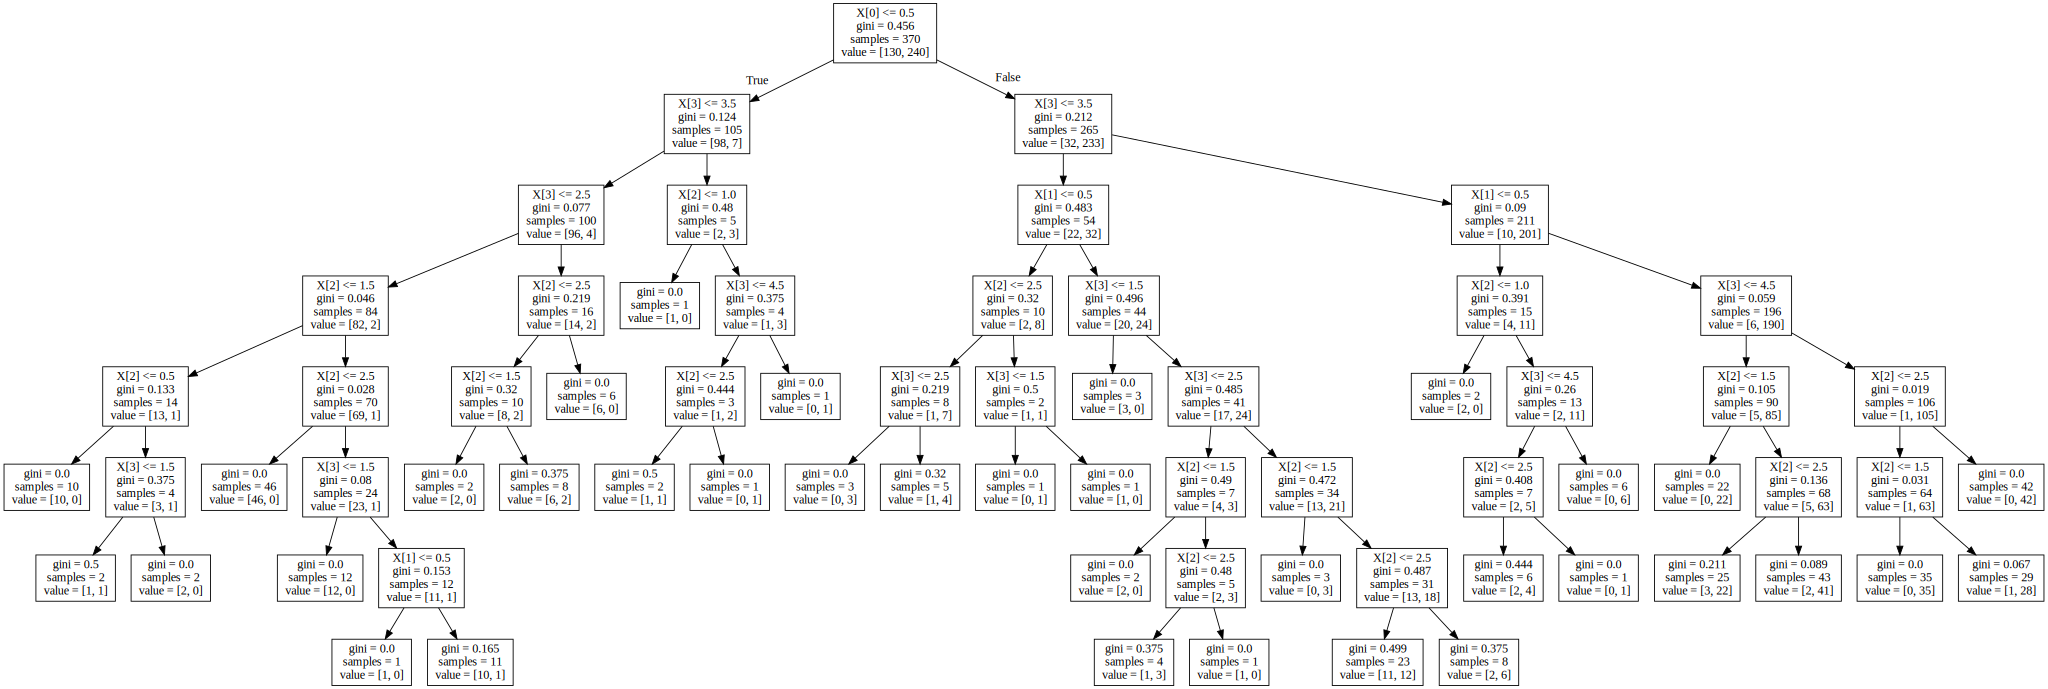

In [20]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [21]:
data.head()

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,1,5,5,5,5,5,4,1,1,Yes,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,Yes,Variety of Product,Yes,Yes,Yes,Yes,No,0,1,2,2,2,2,2,1,1,Yes,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,1,2,2,2,2,2,2,1,1,Yes,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,1,5,5,5,5,5,5,1,1,Yes,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,Yes,Variety of Product,No,Yes,Yes,Yes,No,1,2,2,1,2,2,1,1,3,Yes,3


In [22]:
column_names = ['Quality', 'Quantity', 'Cheaper in price','Satisfaction','Has  COVID-19   increased time you spent online  grocery Shopping    ? ',
       'How often do you shop online in last six month?', 'Overall Experience','Would You Prefer']
data11 = data.reindex(columns = column_names)

In [23]:
data11.head()

,Quality,Quantity,Cheaper in price,Satisfaction,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Overall Experience,Would You Prefer
0,Yes,Yes,Yes,1,1,1,5,Yes
1,Yes,Yes,Yes,0,1,1,1,Yes
2,Yes,Yes,Yes,1,1,1,5,Yes
3,Yes,Yes,Yes,1,1,1,5,Yes
4,No,Yes,Yes,1,1,3,3,Yes


In [24]:
data11=data11.rename(columns={'Would You Prefer':"Decision"})

In [25]:
data11.head()

,Quality,Quantity,Cheaper in price,Satisfaction,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Overall Experience,Decision
0,Yes,Yes,Yes,1,1,1,5,Yes
1,Yes,Yes,Yes,0,1,1,1,Yes
2,Yes,Yes,Yes,1,1,1,5,Yes
3,Yes,Yes,Yes,1,1,1,5,Yes
4,No,Yes,Yes,1,1,3,3,Yes


In [26]:
from chefboost import Chefboost as chef

In [27]:
config = {'algorithm':'ID3'}
model = chef.fit(data11,config)

ID3  tree is going to be built...
-------------------------
finished in  11.868221759796143  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  95.13513513513513 % on  370  instances
Labels:  ['Yes' 'No']
Confusion matrix:  [[239, 17], [1, 113]]
Precision:  93.3594 %, Recall:  99.5833 %, F1:  96.371 %


In [28]:
model.items()

dict_items([('trees', [<module 'outputs/rules/rules' from 'C:\\Users\\RUCHITA ANGRE\\Desktop\\Project msc cs 2\\new\\outputs/rules/rules.py'>]), ('alphas', []), ('config', {'algorithm': 'ID3', 'enableRandomForest': False, 'num_of_trees': 5, 'enableMultitasking': False, 'enableGBM': False, 'epochs': 10, 'learning_rate': 1, 'max_depth': 3, 'enableAdaboost': False, 'num_of_weak_classifier': 4, 'enableParallelism': False, 'num_cores': 2}), ('nan_values', [['Satisfaction', None], ['Has  COVID-19   increased time you spent online  grocery Shopping    ? ', None], ['How often do you shop online in last six month?', None], ['Overall Experience', None]])])

In [29]:
config = {'algorithm':'CART'}
model1 = chef.fit(data11,config)

CART  tree is going to be built...
-------------------------
finished in  12.16672682762146  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  95.13513513513513 % on  370  instances
Labels:  ['Yes' 'No']
Confusion matrix:  [[238, 16], [2, 114]]
Precision:  93.7008 %, Recall:  99.1667 %, F1:  96.3563 %


In [30]:
config = {'algorithm':'C4.5'}
model2 = chef.fit(data11,config)

C4.5  tree is going to be built...
-------------------------
finished in  11.452317237854004  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  92.97297297297297 % on  370  instances
Labels:  ['Yes' 'No']
Confusion matrix:  [[236, 22], [4, 108]]
Precision:  91.4729 %, Recall:  98.3333 %, F1:  94.7791 %


In [31]:
config = {'algorithm':'CHAID'}
model3 = chef.fit(data11,config)

CHAID  tree is going to be built...
-------------------------
finished in  9.756961107254028  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  93.51351351351352 % on  370  instances
Labels:  ['Yes' 'No']
Confusion matrix:  [[236, 20], [4, 110]]
Precision:  92.1875 %, Recall:  98.3333 %, F1:  95.1613 %


In [52]:
feature = ['Yes','Yes','Yes',1, 1,3,4]
prediction = chef.predict(model3, feature)
prediction

'No'

In [42]:
model3

{'trees': [<module 'outputs/rules/rules' from 'C:\\Users\\RUCHITA ANGRE\\Desktop\\Project msc cs 2\\new\\outputs/rules/rules.py'>],
 'alphas': [],
 'config': {'algorithm': 'CHAID',
  'enableRandomForest': False,
  'num_of_trees': 5,
  'enableMultitasking': False,
  'enableGBM': False,
  'epochs': 10,
  'learning_rate': 1,
  'max_depth': 3,
  'enableAdaboost': False,
  'num_of_weak_classifier': 4,
  'enableParallelism': False,
  'num_cores': 2},
 'nan_values': [['Has  COVID-19   increased time you spent online  grocery Shopping    ? ',
   None],
  ['How often do you shop online in last six month?', None],
  ['Overall Experience', None]]}

In [43]:
from chefboost.training import Training


In [44]:
config ={'algorithm':'CHAID'}

In [45]:
Training.findDecision(data11,config)

('Satisfaction', 370, 30.020957339106236, 'ChiSquared')

In [46]:
Training.findGains(data11,config)

{'gains': {'Quality': 27.772081734895387,
  'Quantity': 25.282228512421035,
  'Cheaper in price': 15.49915562520536,
  'Satisfaction': 30.020957339106236,
  'Has  COVID-19   increased time you spent online  grocery Shopping    ? ': 11.498566327188524,
  'How often do you shop online in last six month?': 12.080283808877576,
  'Overall Experience': 27.921143663447673},
 'entropy': 0}